#Análisis Exploratorio

Ernesto Reynoso Lizárraga A01639915

In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.cluster import OPTICS

from sklearn_som.som import SOM

In [114]:
df = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [115]:
x = np.array(df[df.columns[1:]])
x

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [116]:
y = df['country']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166])

In [117]:
def plot_data(points, labels, title):
  fig = plt.figure()
  if points.shape[1] > 2:
    ax = fig.add_subplot(projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
  else:
    plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
  plt.show()

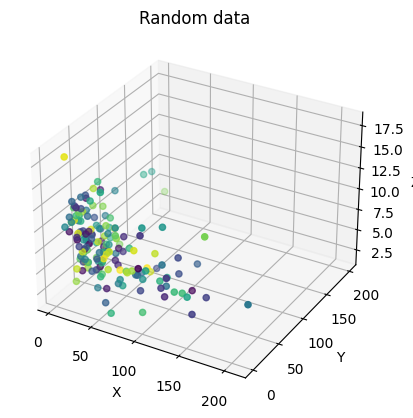

In [118]:
####### Create test data #######
plot_data(x, y, 'Random data')

## Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.

----- K-means -----
Labels:  [1 7 7 1 4 4 1 0 0 7 2 2 1 4 4 0 7 1 1 1 7 7 4 5 7 1 1 1 1 0 1 1 1 4 7 7 1
 1 1 7 1 4 8 2 0 7 7 7 7 2 1 4 7 0 8 4 1 1 0 1 2 7 1 1 1 1 1 4 0 1 7 4 7 0
 8 8 7 0 7 4 1 1 5 1 1 4 4 1 1 2 4 9 7 1 1 4 7 1 2 1 4 1 1 7 7 1 1 1 7 1 0
 8 1 1 6 2 1 4 7 7 1 4 2 3 4 4 1 1 2 1 7 4 1 5 2 2 1 7 2 8 7 7 1 7 0 6 1 1
 7 1 1 1 7 4 7 1 7 5 8 0 4 1 1 4 1 1 1]
Centers:  [[4.25384615e+00 4.69307692e+01 1.08607692e+01 4.27692308e+01
  4.22076923e+04 1.11700000e+00 8.07307692e+01 1.79461538e+00
  4.78846154e+04]
 [7.44707692e+01 2.85599846e+01 6.24676923e+00 4.61302446e+01
  3.02281538e+03 1.01210154e+01 6.27907692e+01 4.31600000e+00
  1.38760000e+03]
 [1.61307692e+01 6.40153846e+01 7.01846154e+00 5.70538462e+01
  3.19076923e+04 6.56315385e+00 7.62384615e+01 2.11307692e+00
  2.06846154e+04]
 [9.00000000e+00 6.23000000e+01 1.81000000e+00 2.38000000e+01
  1.25000000e+05 6.98000000e+00 7.95000000e+01 2.07000000e+00
  7.03000000e+04]
 [1.39600000e+01 4.63320000e+01 6.39800000e+00 4.6204

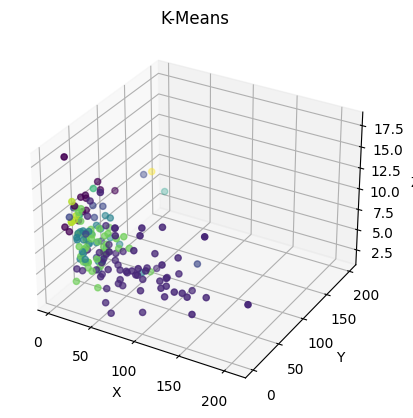

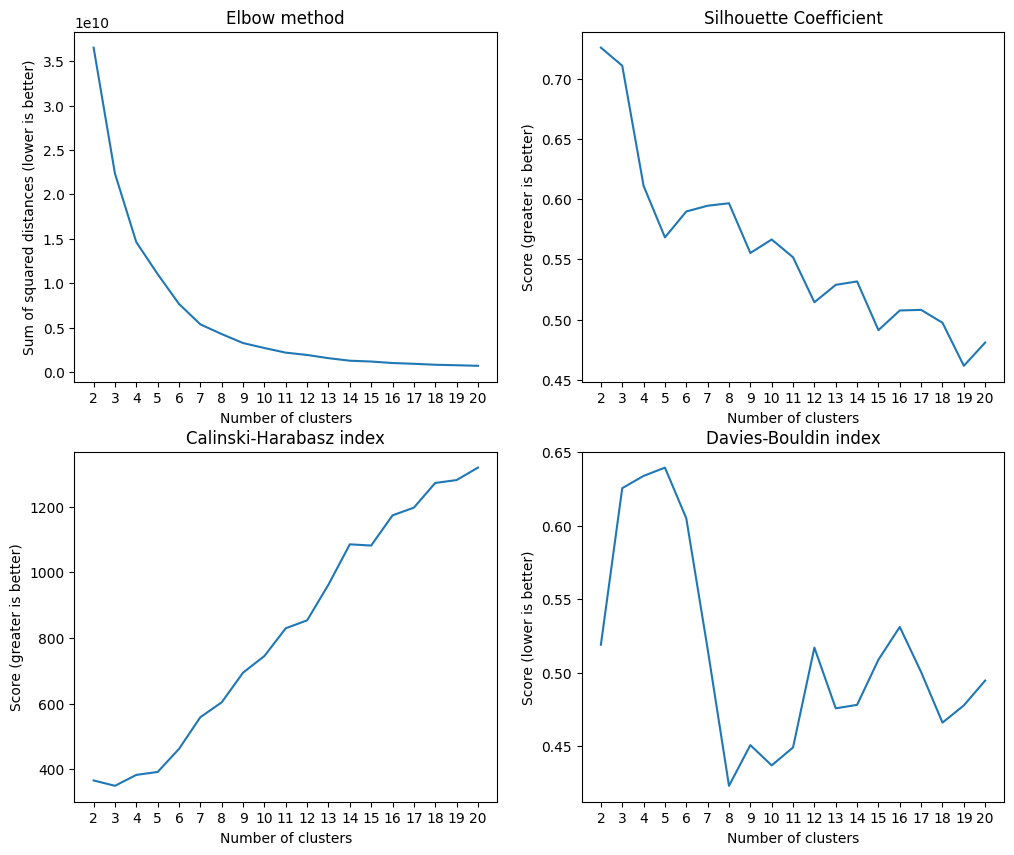

In [119]:
####### K-means #######
print('----- K-means -----')
kmeans = KMeans(n_clusters=10,n_init=10).fit(x)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_
print('Labels: ', clustering_labels)
print('Centers: ', centers)
plot_data(x, clustering_labels, 'K-Means')
# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []
ks = np.arange(2, 21)
for k in ks:
  # Find clustering model
  kmeans = KMeans(n_clusters=k, n_init=k).fit(x)
  # Evaluate sum of squared distances
  sum_of_squared_distances.append(kmeans.inertia_)
  # Evaluate Silhouette score
  sscore.append(silhouette_score(x, kmeans.labels_))
  # Evaluate Calinski-Harabasz index
  chscore.append(calinski_harabasz_score(x, kmeans.labels_))
  # Evaluate Davies-Bouldin index
  dbscore.append(davies_bouldin_score(x, kmeans.labels_))

fig, axs = plt.subplots(2, 2, figsize=(12,10))
axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)
axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')
axs[0][1].set_title('Silhouette Coefficient')
axs[0][1].set_xticks(ks)
axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')
axs[1][0].set_title('Calinski-Harabasz index')
axs[1][0].set_xticks(ks)
axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')
axs[1][1].set_title('Davies-Bouldin index')
axs[1][1].set_xticks(ks)
plt.show()

## Repita lo anterior, pero con otro método de agrupamiento que elijas.

----- OPTICS -----
Labels:  [ 0 11 13  8 -1 15  9 -1 20 -1 -1 21  4 -1 -1 -1 -1  3 -1  7 11 13 -1 22
 -1  1  2  4 -1 20  8  2  3 -1 11 12 -1  2  7 14 -1 -1 18 17 -1 12 11 -1
 10 -1  1 16 10 20 19 14  0  9 19  5 17 12  9 -1  1  8 -1 16 19  6 -1 -1
 13 -1 -1 -1 -1 -1 11 -1  4 -1 22 -1 -1 15 14 -1  2 -1 16 -1 -1  1  2 16
 12  3 17  5 14 -1 -1 10 13  9  2 -1 -1  3 -1 18  2  7 -1 21 -1 14 10 11
  7 16 17 -1 -1 16  1  8 21 -1 13 -1 -1 22 -1 17 -1 12 17 18 -1 12  5 14
 -1 -1  3  3 13 -1 -1  8 11 15 11  0 10 -1 -1 -1 -1  6 -1 -1  6  6  5]


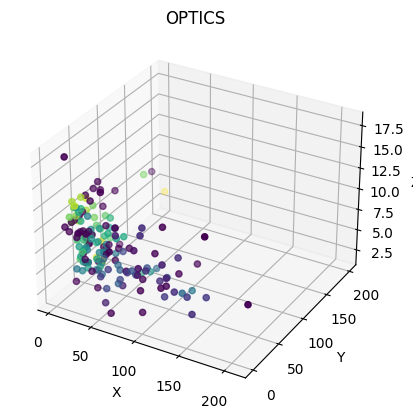

In [120]:
####### OPTICS #######
print('----- OPTICS -----')
optics = OPTICS(min_samples = 3).fit(x)
clustering_labels = optics.labels_
print('Labels: ', clustering_labels)
plot_data(x, clustering_labels, 'OPTICS')

## Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio.

In [125]:
som = SOM(m=100, n=1, dim=9)
som.fit(x)

In [126]:
y_pred = som.predict(x)

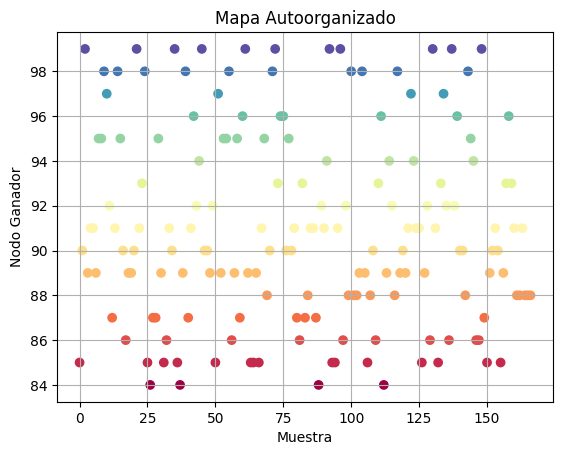

In [127]:
plt.scatter(range(len(y_pred)), y_pred, c=y_pred, cmap='Spectral')
plt.title('Mapa Autoorganizado')
plt.xlabel('Muestra')
plt.ylabel('Nodo Ganador')
plt.grid()
plt.show()

## De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

Al utilizar el metodo de K-means y revisar los resultados podemos notar que el numero optimo de clusters, tomando en cuenta las 4 graficas, es 8, a comparación del modelo inicial donde utilizamos 10 clusters, este podria ser optimizado a 8 para reducir los casos aislados o clusters que no sean relevantes.

En cuanto al mapa autoorganizado, es de utilidad debido a que nos permite visualizar la actividad de las neuronas y asi descartar aquellas que no son utilizadas o ver si alguna neurona tiene mas actividad en comparación a las otras.